## Spam Mail Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
_df = pd.read_csv('mail_data.csv')

In [3]:
_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df = _df.copy()

In [5]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [6]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

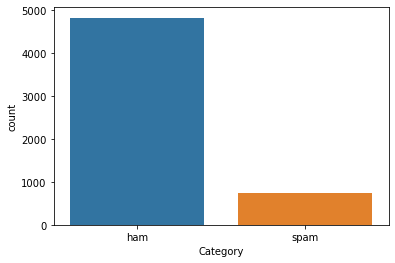

In [7]:
sns.countplot(df['Category'])

### Word Cloud

In [8]:
from wordcloud import WordCloud

In [9]:
spam_mail = df[df['Category'] == 'spam']['Message'].str.cat(sep='')

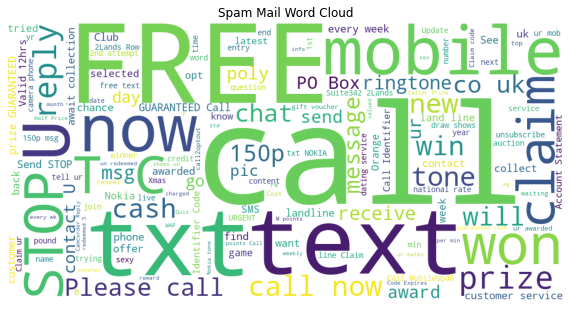

In [10]:
wc = WordCloud(width=1000, max_words=150, background_color='white', height=500).generate(spam_mail)
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.title('Spam Mail Word Cloud')
plt.show()

In [11]:
ham_mail = df[df['Category'] == 'ham']['Message'].str.cat(sep='')

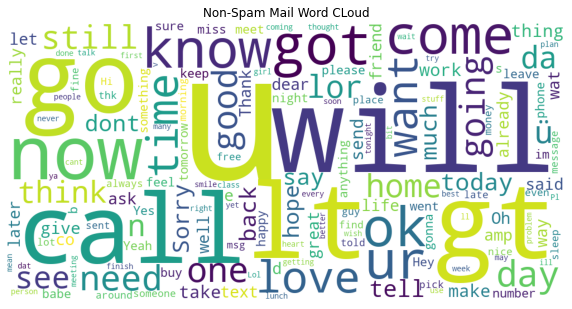

In [12]:
wc = WordCloud(width=1000, max_words=150, background_color='white', height=500).generate(ham_mail)
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off')
plt.title('Non-Spam Mail Word CLoud')
plt.show()

### Input and Target Variable

In [13]:
x = df['Message']
y = df['Category']

In [14]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [15]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

### Label Encoding

In [16]:
y.replace({'ham':0,'spam':1}, inplace=True)

In [17]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

### Training and Testing Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
x_train.head()

2842                                          Ok thanx...
4079                  Gam gone after outstanding innings.
981     If he started searching he will get job in few...
323     cud u tell ppl im gona b a bit l8 cos 2 buses ...
2879    Hey Boys. Want hot XXX pics sent direct 2 ur p...
Name: Message, dtype: object

In [21]:
y_train.head()

2842    0
4079    0
981     0
323     0
2879    1
Name: Category, dtype: int64

### Feature Extraction

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [24]:
x_train_features = tfidf.fit_transform(x_train)
x_test_features = tfidf.transform(x_test)

In [25]:
print(x_train_features)

  (0, 6095)	0.8437344861156781
  (0, 4392)	0.5367607632261439
  (1, 3264)	0.5214725472837892
  (1, 4475)	0.5031112987215672
  (1, 2824)	0.41875050658165497
  (1, 2723)	0.5473512736494375
  (2, 5994)	0.43816614175963103
  (2, 4758)	0.4541571907796826
  (2, 2876)	0.2775024060155931
  (2, 1956)	0.31603157277242133
  (2, 3393)	0.31603157277242133
  (2, 5325)	0.43816614175963103
  (2, 5762)	0.36469523601440296
  (3, 4612)	0.23394615124616022
  (3, 6573)	0.27437803540018846
  (3, 4551)	0.26471707945104367
  (3, 2822)	0.28799438804588473
  (3, 2980)	0.21239137702178362
  (3, 1395)	0.27437803540018846
  (3, 1804)	0.35218420800044364
  (3, 3533)	0.28799438804588473
  (3, 1206)	0.1948851536665205
  (3, 2823)	0.26471707945104367
  (3, 3204)	0.35218420800044364
  (3, 4767)	0.25722345984100126
  :	:
  (3896, 4429)	0.3017798568912697
  (3896, 2779)	0.29185364530477387
  (3896, 5684)	0.2691303212586981
  (3896, 3689)	0.2610200158572762
  (3896, 308)	0.27905653284519394
  (3896, 2899)	0.24934912872429

## Training The Model

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logr = LogisticRegression()

In [28]:
logr.fit(x_train_features, y_train)

LogisticRegression()

In [29]:
logr.score(x_train_features, y_train)

0.967948717948718

In [30]:
logr.score(x_test_features, y_test)

0.9575358851674641

### Evaluating Model

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
pred_train = logr.predict(x_train_features)
acc_train = accuracy_score(y_train, pred_train)

In [33]:
print("Accuracy on Training Data:",acc_train)

Accuracy on Training Data: 0.967948717948718


In [34]:
pred_test = logr.predict(x_test_features)
acc_test = accuracy_score(y_test, pred_test)

In [35]:
print("Accuracy on Testing Data:",acc_test)

Accuracy on Testing Data: 0.9575358851674641


### Confusion Metrics

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
conf_train = confusion_matrix(y_train, pred_train)
conf_train

array([[3370,    3],
       [ 122,  405]], dtype=int64)

In [38]:
conf_test = confusion_matrix(y_test, pred_test)
conf_test

array([[1451,    1],
       [  70,  150]], dtype=int64)

### Building a Predictive System

In [39]:
def mail_detector(input_mail):
    mail_features = tfidf.transform(input_mail)
    mail_prection = logr.predict(mail_features)
    
    if mail_prection[0] == 1:
        return 'spam mail'
    else:
        return 'ham mail'

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


In [40]:
corr = 0
incorr = 0
for i in np.arange(0,100,2):
    label = _df.loc[i][0]
    pred = mail_detector([_df.loc[i][1]])
    
    if _df.loc[i][0] in mail_detector([_df.loc[i][1]]):
        res = "Correct"
        corr += 1
    else:
        res = "Incorrect"
        incorr += 1
    print(f'Label: {label}\t Prediction: {pred}\t Result: {res}')
print(f'\n {corr} Correct :: {incorr} Incorrect :: {corr/(corr+incorr)*100} Score')

Label: ham	 Prediction: ham mail	 Result: Correct
Label: spam	 Prediction: spam mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: spam	 Prediction: spam mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: spam	 Prediction: spam mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: spam	 Prediction: spam mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: Correct
Label: ham	 Prediction: ham mail	 Result: 

### Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier(random_state=0)

### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rdc = RandomForestClassifier(random_state=0)

### Support Vector Machine

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC(kernel='linear', gamma='auto')

### Best Model

In [47]:
models = {'LogisticRegression':logr, 'DecisionTree':dtc, 'RandomForest':rdc, 'SupportVector':svc}
test_accuracy = {}
for name, model in models.items():
    model.fit(x_train_features, y_train)
    test_score = model.score(x_test_features, y_test)
    test_accuracy[name] = test_score
    print(f'Model:{name}\t Testing Accuracy: {test_score}')

for k,v in test_accuracy.items():
    if v == max(test_accuracy.values()):
        print(f'\nBest Model: {k}\t Model Score: {v}')

Model:LogisticRegression	 Testing Accuracy: 0.9575358851674641
Model:DecisionTree	 Testing Accuracy: 0.9671052631578947
Model:RandomForest	 Testing Accuracy: 0.9748803827751196
Model:SupportVector	 Testing Accuracy: 0.986244019138756

Best Model: SupportVector	 Model Score: 0.986244019138756
